Missing Values:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


<ipython-input-19-97586dd7d513>:22: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


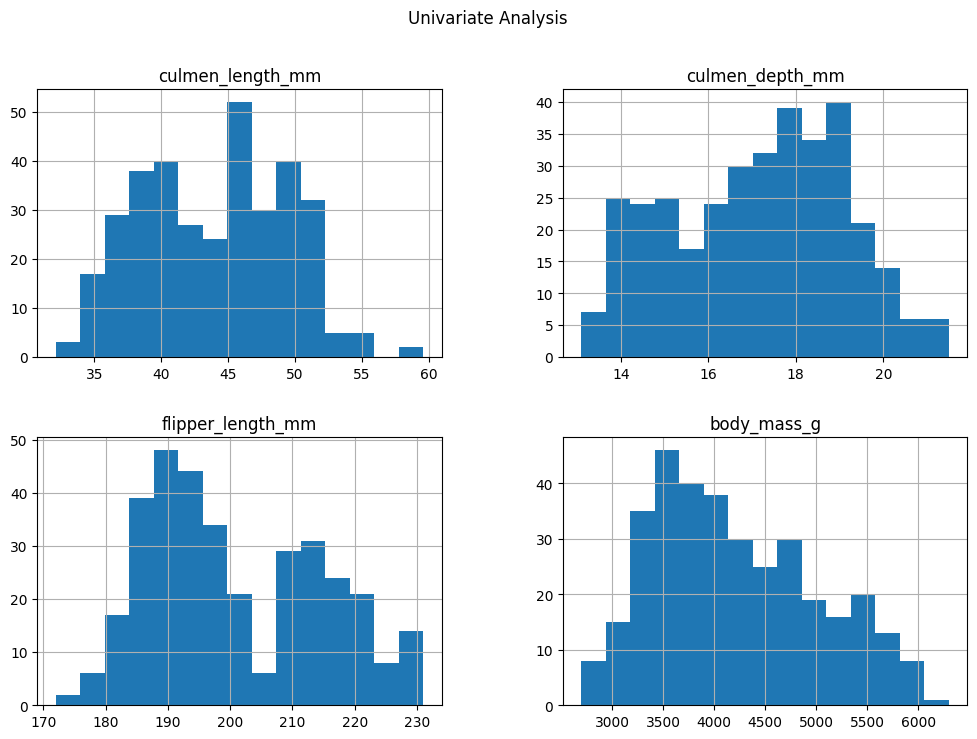

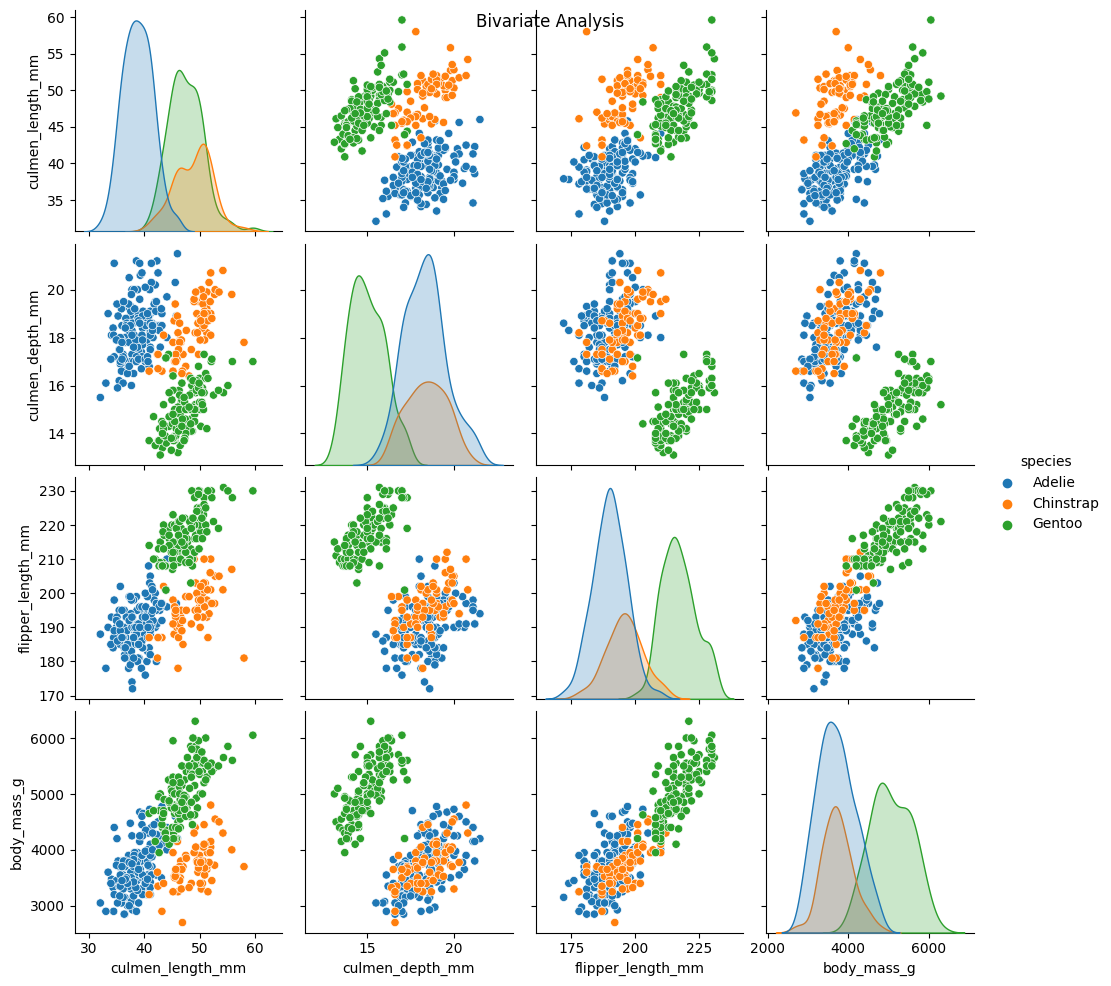

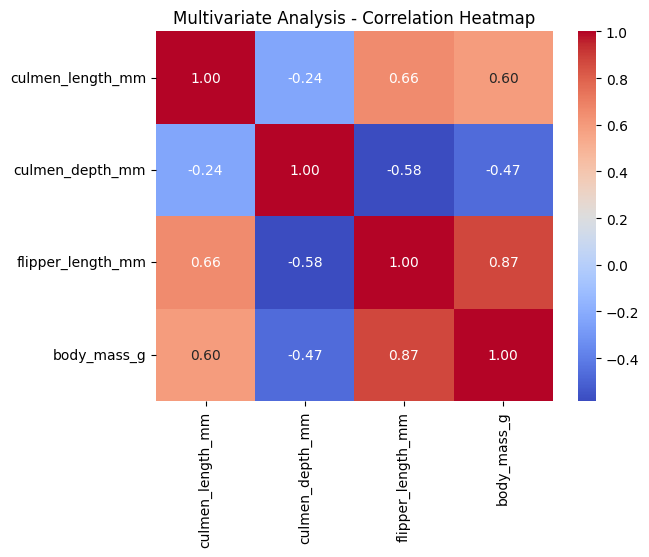

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        344.000000       344.000000         344.000000   344.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.443643         1.969027          14.020657   799.613058
min           32.100000        13.100000         172.000000  2700.000000
25%           39.275000        15.600000         190.000000  3550.000000
50%           44.250000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000
Point-Biserial Correlations:
culmen_length_mm: 0.7286744207103751
culmen_depth_mm: -0.7413346404249744
flipper_length_mm: 0.8511597280750592
body_mass_g: 0.7477259422676263
X_train shape: (275, 8)
X_test shape: (69, 8)
y_train shape: (275,)
y_test shape: (69,)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats

# Load the dataset
data = pd.read_csv('/content/penguins_size.csv')

# Task 5: Check for Missing values and deal with them
# Check for NaN values
missing_values = data.isna().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values (fill with mean for numeric columns)
data.fillna(data.mean(), inplace=True)

# Check for infinity values (replace with a finite value, e.g., 1e9)
data.replace([np.inf, -np.inf], 1e9, inplace=True)

# Task 3: Perform Visualizations (assuming missing and infinity values are handled)
# Univariate Analysis
# Visualize the distribution of numeric variables
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
data[numeric_columns].hist(bins=15, figsize=(12, 8))
plt.suptitle('Univariate Analysis')
plt.show()

# Bivariate Analysis
# Pairplot to visualize relationships between numeric variables
sns.pairplot(data, hue='species')
plt.suptitle('Bivariate Analysis')
plt.show()

# Multivariate Analysis
# Correlation heatmap
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Multivariate Analysis - Correlation Heatmap')
plt.show()

# Task 4: Perform descriptive statistics on the dataset
descriptive_stats = data.describe()
print(descriptive_stats)

# Task 7: Calculate point-biserial correlation with the target variable
label_encoder = LabelEncoder()
data['species_encoded'] = label_encoder.fit_transform(data['species'])  # Encode the target variable

point_biserial_correlations = {}  # Store point-biserial correlations
for col in numeric_columns:
    # Calculate point-biserial correlation
    correlation, p_value = stats.pointbiserialr(data['species_encoded'], data[col])
    point_biserial_correlations[col] = correlation

# Print the point-biserial correlations
print("Point-Biserial Correlations:")
for col, correlation in point_biserial_correlations.items():
    print(f"{col}: {correlation}")

# Task 8: Check for Categorical columns and perform encoding
# One-hot encoding for 'island' and 'sex' columns
data_encoded = pd.get_dummies(data, columns=['island', 'sex'], drop_first=True)

# Task 9: Split data into dependent and independent variables
X = data_encoded.drop(['species', 'species_encoded'], axis=1)
y = data_encoded['species_encoded']

# Task 10: Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Task 11: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Task 12: Check the training and testing data shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Continue with your classification algorithms, training, and evaluation as needed.







In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Print the column names in your dataset
print(data.columns)


Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
